## PS3-4 Semi-supervised EM

\begin{align*}
& = \arg \max_{\theta} \big[ \sum_{i = 1}^{m} \big( \sum_{z^{(i)}} Q_i^{(t)} (z^{(i)}) \log \frac{p(x^{(i)}, z^{(i)}; \ \theta^{(t)})}{Q_i^{(t)} (z^{(i)})} \big) + \alpha \big( \sum_{i = 1}^{\tilde{m}} \log p(\tilde{x}^{(i)}, \tilde{z}^{(i)}; \ \theta^{(t)}) \big) \big] \\
\end{align*}

#### (a) Convergence

For Jensen's Inequality, the equality holds when choosing $Q_i^{(t)} (z^{(i)}) := p(z^{(i)} \ \vert \ x^{(i)} ; \ \theta^{(t)})$.

\begin{align*}
\ell_{\mathrm{semi-sup}} (\theta^{(t + 1)})
    & = \ell_{\mathrm{unsup}} (\theta^{(t + 1)}) + \alpha \ell_{\mathrm{sup}} (\theta^{(t + 1)}) \\
    & \geq \sum_{i = 1}^{m} \mathrm{ELBO} (x^{(i)}; \ Q_i^{(t)}, \theta^{(t + 1)}) + \alpha \ell_{\mathrm{sup}} (\theta^{(t + 1)}) \\
    & \geq \sum_{i = 1}^{m} \mathrm{ELBO} (x^{(i)}; \ Q_i^{(t)}, \theta^{(t)}) + \alpha \ell_{\mathrm{sup}} (\theta^{(t)}) \\
    & = \ell_{\mathrm{unsup}} (\theta^{(t)}) + \alpha \ell_{\mathrm{sup}} (\theta^{(t)}) \\
    & = \ell_{\mathrm{semi-sup}} (\theta^{(t)})
\end{align*}

#### (b) Semi-supervised E-Step

The latent variables are $z^{(i)}$'s.

\begin{align*}
w_j^{(i)} & = Q_i (z^{(i)} = j) \\
          & = p(z^{(i)} = j \ \vert x^{(i)}; \ \phi, \mu, \Sigma) \\
          & = \frac{p(x^{(i)} \ \vert z^{(i)} = j; \ \mu, \Sigma) \ p(z^{(i)} = j; \ \phi)}{\sum_{i = l}^{k} p(x^{(i)} \ \vert \ z^{(i)} = l; \ \mu, \Sigma) \ p(z^{(i)} = l; \ \phi)}
\end{align*}

#### (c) Semi-supervised M-Step

The parameters to re-estimate are $\phi$, $\mu$ and $\Sigma$.

Derive the update rule for $\phi$:

\begin{align*}
\phi_l & = \arg \max_{\phi_l} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma) \\
       & = \arg \max_{\phi_l} \big[ \sum_{i = 1}^{m} \sum_{j = 1}^{k} w_j^{(i)} \log \frac{p(x^{(i)} \ \vert \ z^{(i)} = j; \ \mu_j, \Sigma_j) \ p(z^{(i)} = j; \ \phi_j)}{w_j^{(i)}} \big) + \alpha \sum_{i = 1}^{\tilde{m}} \sum_{j = 1}^{k} 1 \{ \tilde{z}^{(i)} = j \} \log \big( p(\tilde{x}^{(i)} \ \vert \ \tilde{z}^{(i)} = j; \ \mu_j, \Sigma_j) \ p(\tilde{z}^{(i)} = j; \ \phi_j) \big) \big] \\
       & = \arg \max_{\phi_l} \big[ \sum_{i = 1}^{m} \sum_{j = 1}^{k} w_j^{(i)} \log \phi_j + \alpha \sum_{i = 1}^{\tilde{m}} \sum_{j = 1}^{k} 1 \{ \tilde{z}^{(i)} = j \} \log \phi_j \big]
\end{align*}

Computing $\phi_l$ is now reduced to solving the optimization problem

$$\phi_l = \arg \max_{\phi_l} \big[ \sum_{i = 1}^{m} \sum_{j = 1}^{k} w_j^{(i)} \log \phi_j + \alpha \sum_{i = 1}^{\tilde{m}} \sum_{j = 1}^{k} 1 \{ \tilde{z}^{(i)} = j \} \log \phi_j \big] \quad \mathrm{subject} \ \mathrm{to} \sum_{j = 1}^{k} \phi_j = 1$$

Construct the Lagrangian:

$$\mathcal{L}(\phi) = \sum_{i = 1}^{m} \sum_{j = 1}^{k} w_j^{(i)} \log \phi_j + \alpha \sum_{i = 1}^{\tilde{m}} \sum_{j = 1}^{k} 1 \{ \tilde{z}^{(i)} = j \} \log \phi_j + \beta \big( \sum_{j = 1}^{k} \phi_j - 1 \big)$$

Then

\begin{align*}
\phi_l & = \arg_{\phi_l} \big[ \frac{\partial}{\partial \phi_l} \mathcal{L}(\phi) = 0 \big] \\
       & = \arg_{\phi_l} \big[ \sum_{i = 1}^{m} \frac{w_l^{(i)}}{\phi_l} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \} \frac{1}{\phi_l} + \beta = 0 \big] \\
       & = \frac{\sum_{i = 1}^{m} w_l^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \}}{-\beta}
\end{align*}

Since

\begin{align*}
\sum_{j = 1}^{k} \phi_j & = \sum_{j = 1}^{k} \frac{\sum_{i = 1}^{m} w_j^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = j \}}{-\beta} \\
                        & = 1
\end{align*}

we have

$$- \beta = m + \alpha \tilde{m}$$

Hence,

$$\phi_l = \frac{\sum_{i = 1}^{m} w_l^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \}}{m + \alpha \tilde{m}}$$

Derive the update rule for $\mu$:

\begin{align*}
\mu_l & = \arg \max_{\mu_l} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma) \\
      & = \arg_{\mu_l} \big[ \nabla_{\mu_l} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma) = 0 \big] \\
      & = \arg_{\mu_l} \big[ \nabla_{\mu_l} \big( - \frac{1}{2} \sum_{i = 1}^{m} \sum_{j = 1}^{k} w_j^{(i)} (x^{(i)} - \mu_j)^T \Sigma_j^{-1} (x^{(i)} - \mu_j) - \frac{\alpha}{2} \sum_{i = 1}^{\tilde{m}} \sum_{j = 1}^{k} 1 \{ \tilde{z}^{(i)} = j \} (\tilde{x}^{(i)} - \mu_j)^T \Sigma_j^{-1} (\tilde{x}^{(i)} - \mu_j) \big) = 0 \big] \\
      & = \arg_{\mu_l} \big[ \sum_{i = 1}^{m} w_l^{(i)} (\Sigma^{-1} x^{(i)} - \Sigma_l^{-1} \mu_l) + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \} (\Sigma^{-1} \tilde{x}^{(i)} - \Sigma_l^{-1} \mu_l) = 0 \big] \\
      & = \frac{\sum_{i = 1}^{m} w_l^{(i)} x^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \} \tilde{x}^{(i)}}{\sum_{i = 1}^{m} w_l^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \}}
\end{align*}

Derive the update rule for $\Sigma$:

Recall that

\begin{align*}
\det (A^{-1}) & = \frac{1}{\det (A)} \\
\frac{\partial}{\partial A} \log \vert A \vert & = A^{-T}
\end{align*}

Similar to **PS1-4 (d)**,

\begin{align*}
\Sigma_l & = \arg \max_{\Sigma_l} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma) \\
         & = \arg_{\Sigma_l} \big[ \nabla_{\Sigma_l} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma) = 0 \big] \\
         & = \arg_{\Sigma_l} \big[ \nabla_{\Sigma_l^{-1}} \ell_{\mathrm{semi-sup}} (\phi, \mu, \Sigma^{-1}) = 0 \big] \\
         & = \frac{\sum_{i = 1}^{m} w_l^{(i)} (x^{(i)} - \mu_l) (x^{(i)} - \mu_l)^T + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \} (\tilde{x}^{(i)} - \mu_l) (\tilde{x}^{(i)} - \mu_l)^T}{\sum_{i = 1}^{m} w_l^{(i)} + \alpha \sum_{i = 1}^{\tilde{m}} 1 \{ \tilde{z}^{(i)} = l \}}
\end{align*}

#### (d) Classical (Unsupervised) EM Implementation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
PLOT_COLORS = ['red', 'green', 'blue', 'orange']    # Colors for your plots
K = 4                                               # Number of Gaussians in the mixture model
NUM_TRIALS = 3                                      # Number of trials to run (can be adjusted for debugging)
UNLABELED = -1                                      # Cluster label for unlabeled data points (do not change)

In [3]:
def main(is_semi_supervised, trial_num):
    """Problem 3: EM for Gaussian Mixture Models (unsupervised and semi-supervised)"""
    print('Running {} EM algorithm...'
          .format('semi-supervised' if is_semi_supervised else 'unsupervised'))

    # Load dataset
    train_path = os.path.join('.', 'data', 'ds3_train.csv')
    x, z = load_gmm_dataset(train_path)
    x_tilde = None

    if is_semi_supervised:
        # Split into labeled and unlabeled examples
        labeled_idxs = (z != UNLABELED).squeeze()
        x_tilde = x[labeled_idxs, :]   # Labeled examples
        z = z[labeled_idxs, :]         # Corresponding labels
        x = x[~labeled_idxs, :]        # Unlabeled examples

    # *** START CODE HERE ***
    m, n = x.shape

    # (1) Initialize mu and sigma by splitting the m data points uniformly at random
    # into K groups, then calculating the sample mean and covariance for each group
    classes = np.random.randint(K, size=m)
    mu = np.array([np.mean(x[classes == j], axis=0) for j in range(K)]) # Shape (K, n)
    sigma = np.array([np.cov(x[classes == j].T) for j in range(K)])     # Shape (K, n, n)

    # (2) Initialize phi to place equal probability on each Gaussian
    # phi should be a numpy array of shape (K,)
    phi = np.ones((K,)) / K

    # (3) Initialize the w values to place equal probability on each Gaussian
    # w should be a numpy array of shape (m, K)
    w = np.ones((m, K)) / K

    # *** END CODE HERE ***

    if is_semi_supervised:
        w = run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma)
    else:
        w = run_em(x, w, phi, mu, sigma)

    # Plot your predictions
    z_pred = np.zeros(m)
    if w is not None:  # Just a placeholder for the starter code
        for i in range(m):
            z_pred[i] = np.argmax(w[i])

    plot_gmm_preds(x, z_pred, is_semi_supervised, plot_id=trial_num)

In [4]:
def run_em(x, w, phi, mu, sigma):
    """Problem 3(d): EM Algorithm (unsupervised).

    See inline comments for instructions.

    Args:
        x: Design matrix of shape (m, n).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    eps = 1e-3  # Convergence threshold
    max_iter = 1000

    m, n = x.shape
    K, _ = mu.shape
    X = np.repeat(x.reshape(m, -1, n), K, axis=1)   # Shape (m, K, n)

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # *** START CODE HERE

        # (1) E-step: Update your estimates in w
        p_joint = gaussian_pdf(x, mu, sigma) * phi
        w = p_joint / p_joint.sum(axis=1, keepdims=True)

        # (2) M-step: Update the model parameters phi, mu, and sigma
        X_normed = X - mu   # Each element on axis 1 represents (x - mu_k) where k is the corresponding class. Shape (m, K, n)
        phi = w.sum(axis=0) / m
        mu = w.T @ x / w.sum(axis=0).reshape((K, -1))
        sigma = np.sum(w.reshape((m, K, 1, 1)) * np.einsum('ijk,ijl->ijkl', X_normed, X_normed), axis=0) / w.sum(axis=0).reshape((K, 1, 1))

        # (3) Compute the log-likelihood of the data to check for convergence.
        # By log-likelihood, we mean `ll = sum_x[log(sum_z[p(x|z) * p(z)])]`.
        # We define convergence by the first iteration where abs(ll - prev_ll) < eps.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        p_joint = gaussian_pdf(x, mu, sigma) * phi
        p_x = p_joint.sum(axis=1)
        ll = np.sum(np.log(p_x))
        it += 1

        # *** END CODE HERE ***

    print('EM converged after {} iterations'.format(it))

    return w

In [5]:
# Helper functions

def gaussian_pdf(x, mu, sigma, z=None):
    """Compute Gaussian densities

    Args:
        x: Shape (m, n).
        mu: Shape (K, n).
        sigma: Shape(K, n, n).
        z: Shape (m,).

    Returns:
        The Gaussian densities for all possible z_i's if z is not specified, otherwise
        return the density computed using the specified z.
    """

    m, n = x.shape
    K, _ = mu.shape

    sigma_inv = np.linalg.inv(sigma)
    sigma_det = np.linalg.det(sigma)

    if z is None:
        X = np.repeat(x.reshape(m, -1, n), K, axis=1)   # Shape (m, K, n)
        X_normed = X - mu                               # Shape (m, K, n)
        norm_factor = 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(sigma_det))  # Shape (K,)
        return norm_factor * np.exp(-0.5 * np.einsum('ijk,ijk->ij', np.einsum('ijk,jkl->ijl', X_normed, sigma_inv), X_normed))

    z = z.reshape((m,)).astype(int)
    mu_z = mu[z].reshape((m, n, 1))
    x_normed = x.reshape((m, n, 1)) - mu_z
    exponents = (np.transpose(x_normed, (0, 2, 1)) @ sigma_inv[z] @ x_normed).reshape((m,))
    return 1 / ((2 * np.pi) ** (n / 2) * np.sqrt(sigma_det[z])) * np.exp(-0.5 * exponents)


In [6]:
def plot_gmm_preds(x, z, with_supervision, plot_id):
    """Plot GMM predictions on a 2D dataset `x` with labels `z`.

    Write to the output directory, including `plot_id`
    in the name, and appending 'ss' if the GMM had supervision.

    NOTE: You do not need to edit this function.
    """
    plt.figure(figsize=(12, 8))
    plt.title('{} GMM Predictions'.format('Semi-supervised' if with_supervision else 'Unsupervised'))
    plt.xlabel('x_1')
    plt.ylabel('x_2')

    for x_1, x_2, z_ in zip(x[:, 0], x[:, 1], z):
        color = 'gray' if z_ < 0 else PLOT_COLORS[int(z_)]
        alpha = 0.25 if z_ < 0 else 0.75
        plt.scatter(x_1, x_2, marker='.', c=color, alpha=alpha)

    # file_name = 'p03_pred{}_{}.pdf'.format('_ss' if with_supervision else '', plot_id)
    # save_path = os.path.join('output', file_name)
    # plt.savefig(save_path)

In [7]:
def load_gmm_dataset(csv_path):
    """Load dataset for Gaussian Mixture Model (problem 3).

    Args:
         csv_path: Path to CSV file containing dataset.

    Returns:
        x: NumPy array shape (m, n)
        z: NumPy array shape (m, 1)

    NOTE: You do not need to edit this function.
    """

    # Load headers
    with open(csv_path, 'r') as csv_fh:
        headers = csv_fh.readline().strip().split(',')

    # Load features and labels
    x_cols = [i for i in range(len(headers)) if headers[i].startswith('x')]
    z_cols = [i for i in range(len(headers)) if headers[i] == 'z']

    x = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=x_cols, dtype=float)
    z = np.loadtxt(csv_path, delimiter=',', skiprows=1, usecols=z_cols, dtype=float)

    if z.ndim == 1:
        z = np.expand_dims(z, axis=-1)

    return x, z

Running unsupervised EM algorithm...
EM converged after 167 iterations
Running unsupervised EM algorithm...
EM converged after 167 iterations
Running unsupervised EM algorithm...
EM converged after 119 iterations


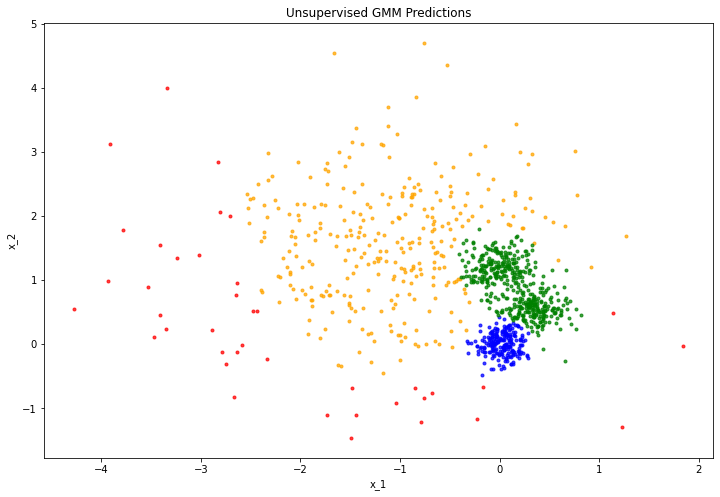

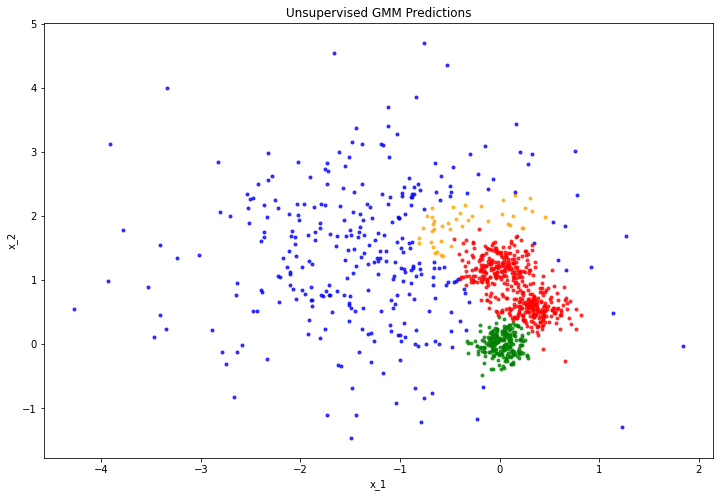

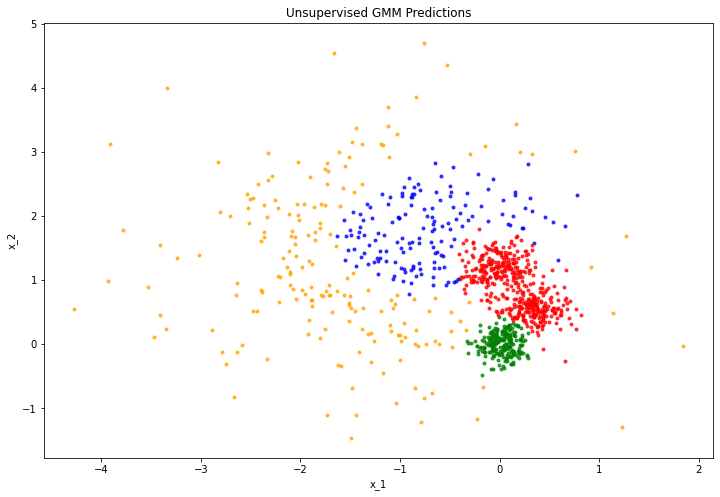

In [8]:
if __name__ == '__main__':
    np.random.seed(229)
    # Run NUM_TRIALS trials to see how different initializations
    # affect the final predictions with and without supervision
    for t in range(NUM_TRIALS):
        main(is_semi_supervised=False, trial_num=t)

#### (e) Semi-supervised EM Implementation

In [9]:
def run_semi_supervised_em(x, x_tilde, z, w, phi, mu, sigma):
    """Problem 3(e): Semi-Supervised EM Algorithm.

    See inline comments for instructions.

    Args:
        x: Design matrix of unlabeled examples of shape (m, n).
        x_tilde: Design matrix of labeled examples of shape (m_tilde, n).
        z: Array of labels of shape (m_tilde, 1).
        w: Initial weight matrix of shape (m, k).
        phi: Initial mixture prior, of shape (k,).
        mu: Initial cluster means, list of k arrays of shape (n,).
        sigma: Initial cluster covariances, list of k arrays of shape (n, n).

    Returns:
        Updated weight matrix of shape (m, k) resulting from semi-supervised EM algorithm.
        More specifically, w[i, j] should contain the probability of
        example x^(i) belonging to the j-th Gaussian in the mixture.
    """
    # No need to change any of these parameters
    alpha = 20.  # Weight for the labeled examples
    eps = 1e-3   # Convergence threshold
    max_iter = 1000

    m, n = x.shape
    m_tilde, _ = x_tilde.shape

    X = np.repeat(x.reshape(m, -1, n), K, axis=1)   # Shape (m, K, n)
    X_tilde = np.repeat(x_tilde.reshape(m_tilde, -1, n), K, axis=1)
    w_tilde = z == np.array(range(K))

    # Stop when the absolute change in log-likelihood is < eps
    # See below for explanation of the convergence criterion
    it = 0
    ll = prev_ll = None
    while it < max_iter and (prev_ll is None or np.abs(ll - prev_ll) >= eps):
        # *** START CODE HERE ***

        X_normed = X - mu               # Shape (m, K, n)
        X_tilde_normed = X_tilde - mu   # Shape (m_tilde, K, n)

        # (1) E-step: Update your estimates in w
        p_joint_unsup = gaussian_pdf(x, mu, sigma) * phi
        w = p_joint_unsup / p_joint_unsup.sum(axis=1, keepdims=True)

        # (2) M-step: Update the model parameters phi, mu, and sigma
        phi = (w.sum(axis=0) + alpha * w_tilde.sum(axis=0)) / (m + alpha * m_tilde)

        mu = (w.T @ x + alpha * w_tilde.T @ x_tilde) / (w.sum(axis=0) + alpha * w_tilde.sum(axis=0)).reshape((K, -1))

        x_weighted_sum = np.sum(w.reshape((m, K, 1, 1)) * np.einsum('ijk,ijl->ijkl', X_normed, X_normed), axis=0)
        x_tilde_weighted_sum = np.sum(w_tilde.reshape((m_tilde, K, 1, 1)) * np.einsum('ijk,ijl->ijkl', X_tilde_normed, X_tilde_normed), axis=0)
        sigma = (x_weighted_sum + alpha * x_tilde_weighted_sum) / (w.sum(axis=0) + alpha * w_tilde.sum(axis=0)).reshape((K, 1, 1))

        # (3) Compute the log-likelihood of the data to check for convergence.
        # Hint: Make sure to include alpha in your calculation of ll.
        # Hint: For debugging, recall part (a). We showed that ll should be monotonically increasing.
        prev_ll = ll
        p_joint_unsup = gaussian_pdf(x, mu, sigma) * phi
        p_x_unsup = p_joint_unsup.sum(axis=1)
        p_joint_sup = gaussian_pdf(x_tilde, mu, sigma, z) * phi[z.reshape((m_tilde,)).astype(int)]
        ll = np.sum(np.log(p_x_unsup)) + np.sum(np.log(p_joint_sup))
        it += 1

        # *** END CODE HERE ***
    print('Semi-supervised EM converged after {} iterations.'.format(it))

    return w

Running semi-supervised EM algorithm...
Semi-supervised EM converged after 40 iterations.
Running semi-supervised EM algorithm...
Semi-supervised EM converged after 34 iterations.
Running semi-supervised EM algorithm...
Semi-supervised EM converged after 25 iterations.


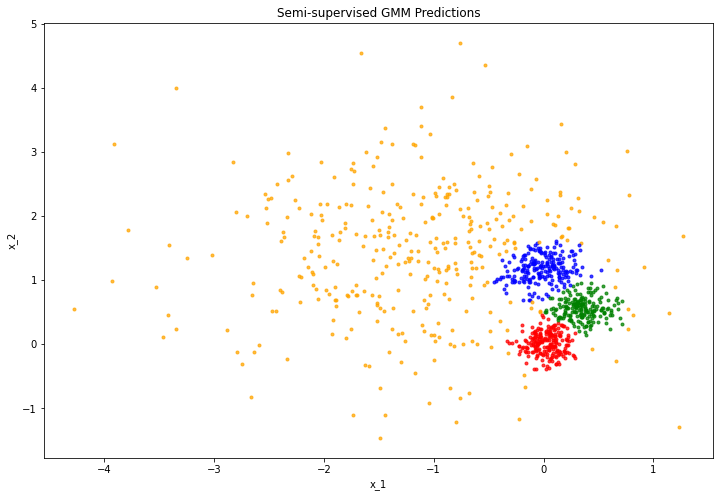

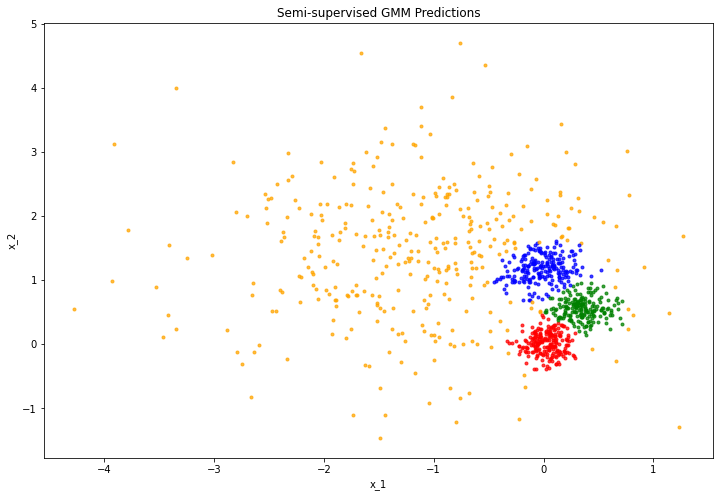

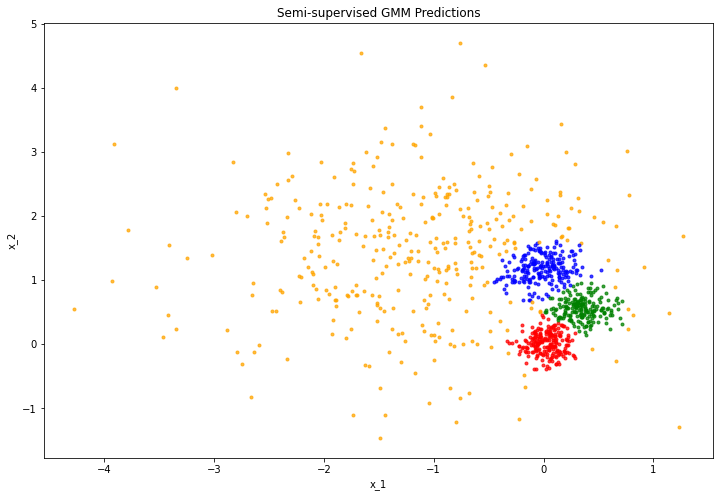

In [10]:
if __name__ == '__main__':
    np.random.seed(229)
    # Run NUM_TRIALS trials to see how different initializations
    # affect the final predictions with and without supervision
    for t in range(NUM_TRIALS):
        main(is_semi_supervised=True, trial_num=t)

#### (f) Comparison of Unsupervised and Semi-supervised EM

##### i.

The classic unsupervised EM converged after more than 100 iterations (120 to 170), whereas the semi-supervised EM converged much faster with less than 50 iterations.

##### ii.

Although the unsupervised EM is able to cluster the data, due to the random initialization, there is no guarantee that
the assignments (colors) are always the same. In contrast, for semi-supervised EM, the observations can guide the algorithm
to assign the same value (color) to each cluster, regardless how many times the algorithm runs.

##### iii.

The unsupervised EM identified the low-variance Gaussian distributions, but failed on those with high variance. However,
The semi-supervised EM did much better on Gaussians with either low or high variance.